# Датасеты к задаче выявления новизны

В данном ноутбуке будет описан процесс получения датасета для задачи выявления новизны - датасета, собранного из реальных данных(твиты) и размеченного самостоятельно определенным образом.

## Новые темы обсуждения в твиттере

Из открытых источников были собраны различные датасеты, в которых описаны твиты за различное время, и каждый датасет отличается тематикой от остальных. Тематика при сборе датасетов определялась в основном хештегами в твиттах.

Агрегирующий сайт, с помощью которого можно найти все датасеты:

https://www.trackmyhashtag.com/blog/free-twitter-datasets/

Цель: скачать все датасеты, выделить в них временную метку и текст и затем склеить все датасеты в один большой, сохранить его версию с временными метками и без них.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm

In [2]:
# s = ''.join(df1.content)
# symbols = set(s)
# ords = list(map(ord, symbols))
# print( list( map(chr, filter(lambda code: 33 <= code <= 126, ords)) ) )
#print( list( map(chr, np.arange(33, 127).tolist()) ) )
#print( list( map(chr, np.arange(1, 161).tolist()) ) )
#set('abcdefg') & set('defghjui')
alphabet = list( map(chr, np.arange(1, 161).tolist()) ) # 256

### Covid-19

In [3]:
df1 = pd.read_csv('twitter_dataset/COVID-19/COVID.csv')

In [4]:
df1.head(2)

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet Id                    60160 non-null  object 
 1   Tweet URL                   60160 non-null  object 
 2   Tweet Posted Time (UTC)     60160 non-null  object 
 3   Tweet Content               60160 non-null  object 
 4   Tweet Type                  60160 non-null  object 
 5   Client                      60160 non-null  object 
 6   Retweets Received           60160 non-null  int64  
 7   Likes Received              60160 non-null  int64  
 8   Tweet Location              40620 non-null  object 
 9   Lat                         19 non-null     float64
 10  Long                        19 non-null     float64
 11  Tweet Language              59012 non-null  object 
 12  User Id                     60160 non-null  object 
 13  Name                        601

In [6]:
df1 = df1[['Tweet Posted Time (UTC)', 'Tweet Content']]
df1.columns = ['time', 'content']

In [7]:
df1['time'] = pd.to_datetime(df1['time'], utc=True)

In [8]:
drop_ind = []
for i, line in enumerate(df1.content):
    if len(set(line) - set(alphabet)) != 0:
        drop_ind.append(i)
df1.drop(drop_ind, inplace=True)

In [9]:
df1.sort_values( by='time', inplace=True )
# df1 = df1.iloc[:20000]
print( df1.shape )
df1.drop_duplicates(subset=['content'], inplace=True)
ind = []
for i, line in tqdm( enumerate( df1.content ) ):
    if 'coronavirus' in line.lower() and 'rt ' not in line.lower():
        ind.append(i)
        
print(len(ind))
df1 = df1.iloc[ind]

(27535, 2)



7603


In [10]:
df1.head(2)

,time,content
60159,2019-12-01 03:17:00+00:00,A review of asymptomatic and sub-clinical Midd...
60148,2019-12-12 20:30:55+00:00,Molecular mechanism for antibody-dependent enh...


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7603 entries, 60159 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     7603 non-null   datetime64[ns, UTC]
 1   content  7603 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 178.2+ KB


### Russian troll tweets

Несколько .csv файлов с твитами российских "тролей"

In [12]:
df2 = pd.read_csv('twitter_dataset/russian-troll-tweets/1.csv')
df2.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN


In [13]:
def append(df1, df2):
    if df1.size == 0:
        return df2
    return pd.concat( [df1, df2] )

In [14]:
df2 = pd.DataFrame()

In [15]:
dataset_dir = 'twitter_dataset/russian-troll-tweets'
for i, filename in enumerate( os.listdir(dataset_dir) ):
    if filename[-3:] != 'csv':
        continue
    tmp = pd.read_csv('/'.join( (dataset_dir, filename) ))
    tmp = tmp[['publish_date', 'content']]
    tmp.columns = ['time', 'content']
    df2 = append(df2, tmp)
    break

In [16]:
df2['time'] = pd.to_datetime( df2['time'], utc=True )
df2.sort_values( by='time', inplace=True )
df2.dropna(inplace=True)
df2 = df2.iloc[:50000].copy()
df2.shape

(50000, 2)

In [17]:
df2.head(2)

,time,content
119788,2012-02-02 00:35:00+00:00,Реклама в Facebook: причина успеха: Facebook с...
119789,2012-02-02 00:58:00+00:00,"""Локомотив"" и ""Зенит"" так и не договорились по..."


In [19]:
drop_ind = []
for i, line in enumerate( df2.content ): 
    if len(set(line) - set(alphabet)) != 0:
        drop_ind.append(i)

In [20]:
len(drop_ind)

23945

In [21]:
df2.shape

(50000, 2)

In [22]:
df2.drop(df2.index[drop_ind], axis=0, inplace=True)
df2.shape

(26055, 2)

In [23]:
print( df2.shape )
df2.drop_duplicates(subset=['content'], inplace=True)
ind = []
for i, line in tqdm( enumerate( df2.content ) ):
    if 'rt ' not in line.lower():
        ind.append(i)
        
print(len(ind))
df2 = df2.iloc[ind]

(26055, 2)



22871


In [24]:
df2.head(2)

,time,content
17796,2012-07-09 12:16:00+00:00,aku rak melu ae piye wes -_- drpd ribet
17797,2012-07-09 12:20:00+00:00,'@BaguzTok_ wkwk berusaha utk membuat tmn baha...


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22871 entries, 17796 to 158234
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     22871 non-null  datetime64[ns, UTC]
 1   content  22871 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 536.0+ KB


### Apple Sentiment Tweets

In [26]:
base_dir = 'twitter_dataset/apple-sentiment'
df3 = pd.read_csv('/'.join((base_dir, 'data.csv')), encoding="ISO-8859-1")

In [27]:
df3.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...


In [28]:
df3 = df3[['date', 'text']]
df3.columns = ['time', 'content']

In [29]:
df3['time'] = pd.to_datetime(df3['time'])

In [30]:
df3.head(2)

,time,content
0,2014-12-01 19:30:03+00:00,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,2014-12-01 19:43:51+00:00,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...


In [31]:
drop_ind = []
for i, line in enumerate(df3.content):
    if len(set(line) - set(alphabet)) != 0:
        drop_ind.append(i)
df3.drop(drop_ind, inplace=True)

In [32]:
df3.sort_values( by='time', inplace=True )
df3 = df3.iloc[:10000]
print( df3.shape )
df3.drop_duplicates(subset=['content'], inplace=True)
ind = []
for i, line in tqdm( enumerate( df3.content ) ):
    if 'rt ' not in line.lower():
        ind.append(i)
        
print(len(ind))
df3 = df3.iloc[ind]

(3859, 2)



2840


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 3883
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     2840 non-null   datetime64[ns, UTC]
 1   content  2840 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 66.6+ KB


### US elections

In [34]:
df4 = pd.DataFrame()
dataset_dir = "twitter_dataset/us elections 2020"

In [35]:
pd.read_csv('/'.join((dataset_dir, "AndrewYang.csv"))).head(2)

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,URLs,Hashtags,Mentions
0,1096442292527874048,Deaths now outnumber births among white people...,Andrew Yang,AndrewYang,Fri Feb 15 16:13:08 +0000 2019,2215,816,English,"<a href=""https://coschedule.com"" rel=""nofollow...",Tweet,NaN,1,0,0
1,1096446574656393217,@pfrench99 Thanks Peter! 👍,Andrew Yang,AndrewYang,Fri Feb 15 16:30:09 +0000 2019,5,0,English,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0,0,1


In [36]:
for filename in os.listdir(dataset_dir):
    if filename[-3:] != 'csv':
        continue
    tmp = pd.read_csv('/'.join((dataset_dir, filename)))
    tmp = tmp[['Created At', 'Text']]
    tmp.columns = ['time', 'content']
    df4 = append(df4, tmp)

In [37]:
df4.shape

(77329, 2)

In [38]:
df4['time'] = pd.to_datetime(df4['time'])

In [39]:
stay_ind = []
for i, line in enumerate(df4.content):
    if len(set(line) - set(alphabet)) == 0:
        stay_ind.append(i)

df4 = df4.iloc[stay_ind]
#df4.drop(drop_ind, inplace=True)

In [40]:
df4.shape

(50202, 2)

In [41]:
df4.sort_values( by='time', inplace=True )
df4 = df4.iloc[:10000]
print( df4.shape )
df4.drop_duplicates(subset=['content'], inplace=True)
ind = []
for i, line in tqdm( enumerate( df4.content ) ):
    if 'rt ' not in line.lower():
        ind.append(i)
        
print(len(ind))
df4 = df4.iloc[ind]

(10000, 2)



9087


In [42]:
df4.head(2)

,time,content
0,2007-10-24 22:45:57+00:00,Tune in 11:30 ET tomorrow for a live webcast o...
1,2007-12-29 15:35:26+00:00,"Iowans, there's a good chance there's a Biden ..."


In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9087 entries, 0 to 939
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     9087 non-null   datetime64[ns, UTC]
 1   content  9087 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 213.0+ KB


### Объединяем

"Нормальными" твитами будем сначала считать последовательность твитов одной из групп. Начиная с некоторого момента времени, посреди твитов этой группы начнут появляться твиты другой группы. Будем помечать их как аномальные - это и будет новизна в данных. Начиная с некоторого порога появления этих "новых" данных, будем уже считать твиты этой группы "нормальными" и помечать их соответствующе. Таким же образом будем вводить твиты оставшихся групп. Так, получим размеченный датасет в виде временного ряда, который можно будет использовать для обучения и/или проверки предсказания.

### Размечаем

Поправим вручную датасет: просмотрим твиты и удалим те из них, которые являются псевдодупликатами, либо не имеют ничего общего с тематикой. Мы хотим от каждого "нового" датасета 2000 экземпляров, по 5% будут новизной, то есть 100 объектов 

In [44]:
print( [min(df1['time']), min(df2['time']), min(df3['time']), min(df4['time'])] )
print ( [max(df1['time']), max(df2['time']), max(df3['time']), max(df4['time'])] )

[Timestamp('2019-12-01 03:17:00+0000', tz='UTC'), Timestamp('2012-07-09 12:16:00+0000', tz='UTC'), Timestamp('2014-12-01 19:30:03+0000', tz='UTC'), Timestamp('2007-10-24 22:45:57+0000', tz='UTC')]
[Timestamp('2020-02-28 15:44:49+0000', tz='UTC'), Timestamp('2015-12-05 23:11:00+0000', tz='UTC'), Timestamp('2014-12-09 23:45:59+0000', tz='UTC'), Timestamp('2017-04-06 23:10:02+0000', tz='UTC')]


Будем считать, что изначально нормальный класс у нас - это 4 группа твитов, там не будет новизны. 

В качестве новизны будем считать первые 5%(в порядке публикации твитов) каждого датасета из оставшихся.

In [45]:
df4.sort_values( by='time', inplace=True )
df1.sort_values( by='time', inplace=True )
df2.sort_values( by='time', inplace=True )
df3.sort_values( by='time', inplace=True )

In [46]:
df1.shape, df2.shape, df3.shape, df4.shape

((7603, 2), (22871, 2), (2840, 2), (9087, 2))

In [47]:
lens = [2000, 2000, 2000, 9000]

In [48]:
df4 = df4.iloc[:lens[3]]
df4['novel'] = np.zeros( df4.shape[0], dtype=float )
df4['type'] = np.array( [4] * df4.shape[0], dtype=int )

In [49]:
df1 = df1.iloc[:lens[0]]
df1['novel'] = np.array([1] * int( df1.shape[0] * 0.05 ) + [0] * (df1.shape[0] - int(df1.shape[0] * 0.05)),
                        dtype=float)
df1['type'] = np.array( [1] * df1.shape[0], dtype=int )

In [50]:
df2 = df2.iloc[:lens[1]]
df2['novel'] = np.array([1] * int( df2.shape[0] * 0.05 ) + [0] * (df2.shape[0] - int(df2.shape[0] * 0.05)),
                        dtype=float)
df2['type'] = np.array( [2] * df2.shape[0], dtype=int )

In [51]:
df3 = df3.iloc[:lens[2]]
df3['novel'] = np.array([1] * int( df3.shape[0] * 0.05 ) + [0] * (df3.shape[0] - int(df3.shape[0] * 0.05)),
                        dtype=float)
df3['type'] = np.array( [3] * df3.shape[0], dtype=int )

### Скачиваем

In [52]:
df1.shape, df2.shape, df3.shape, df4.shape

((2000, 4), (2000, 4), (2000, 4), (9000, 4))

In [53]:
df = pd.concat([df4, df1, df2, df3])

In [54]:
df.sort_values(by='time', inplace=True)

In [55]:
df.head()

,time,content,novel,type
0,2007-10-24 22:45:57+00:00,Tune in 11:30 ET tomorrow for a live webcast o...,0.0,4
1,2007-12-29 15:35:26+00:00,"Iowans, there's a good chance there's a Biden ...",0.0,4
0,2009-06-10 00:04:48+00:00,Met with Judge Sotomayor today. Very impressiv...,0.0,4
1,2009-06-12 21:28:47+00:00,"PHOTOS: On June 12, Michael Bennet met with me...",0.0,4
2,2009-06-15 20:44:18+00:00,PHOTOS: Women for Bennet held a fundraiser for...,0.0,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 31107
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     15000 non-null  datetime64[ns, UTC]
 1   content  15000 non-null  object             
 2   novel    15000 non-null  float64            
 3   type     15000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 585.9+ KB


In [57]:
df.describe()

,novel,type
count,15000.000000,15000.000000
mean,0.020000,3.200000
std,0.140005,1.107587
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,4.000000
75%,0.000000,4.000000
max,1.000000,4.000000


In [58]:
df.novel.sum() / df.shape[0]

0.02

In [60]:
df.to_csv('twitter_dataset_4_9000_2000.csv')

In [75]:
df['type']

0        4
1        4
0        4
1        4
2        4
        ..
31144    1
31135    1
31128    1
31119    1
31107    1
Name: type, Length: 15000, dtype: int64

No handles with labels found to put in legend.


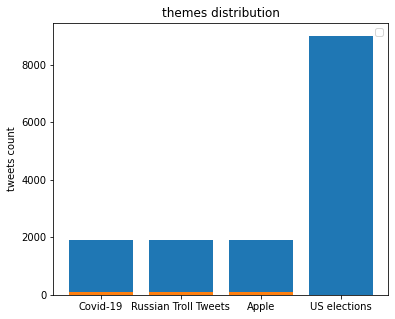

In [124]:
plt.figure(figsize=(6,5))
ax = plt.subplot(111)

norm_height = []
nov_height = []
for i in range(1, 5):
    nov_height.append( df[df['type'] == i].novel.sum() )
    norm_height.append( df[df['type'] == i].novel.count() - df[df['type'] == i].novel.sum() )
    
ax.bar([1,2,3,4], norm_height)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Covid-19', 'Russian Troll Tweets', 'Apple', 'US elections'], rotation=0)
plt.ylabel('tweets count')
plt.title('themes distribution')
ax.bar([1,2,3,4], nov_height)
ax.legend()
# plt.savefig('bins.png')

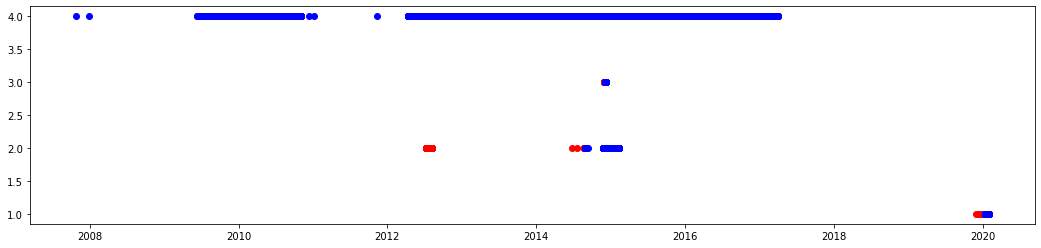

In [73]:
plt.figure(figsize=(18,4))
target = df['type'].tolist()
norm = df[df['novel'] == 0]
nov = df[df['novel'] == 1]

plt.scatter(nov['time'], nov['type'].tolist(), c='r')
plt.scatter(norm['time'], norm['type'].tolist(), c='b')

# for tp in np.unique(target):
#     t = df[df['type'] == tp]
    
    
#     plt.scatter(t['time'], t)

In [100]:
xx = np.array([
    [10,10,10,10],
    [3,4,5,6],
    [2,3,4,5],
    [7,8,9,10],
    [1,1,1,1],
    [6,6,6,6]
])
np.partition(xx, (0,1,2), axis=0)

array([[ 1,  1,  1,  1],
       [ 2,  3,  4,  5],
       [ 3,  4,  5,  6],
       [ 7,  8,  9, 10],
       [10, 10, 10, 10],
       [ 6,  6,  6,  6]])